# Image Compression

In [99]:
from PIL import Image
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [21]:
gaussimg = Image.open(r"data/gauss.jpg")
gaussimg = gaussimg.resize((1024,1024))

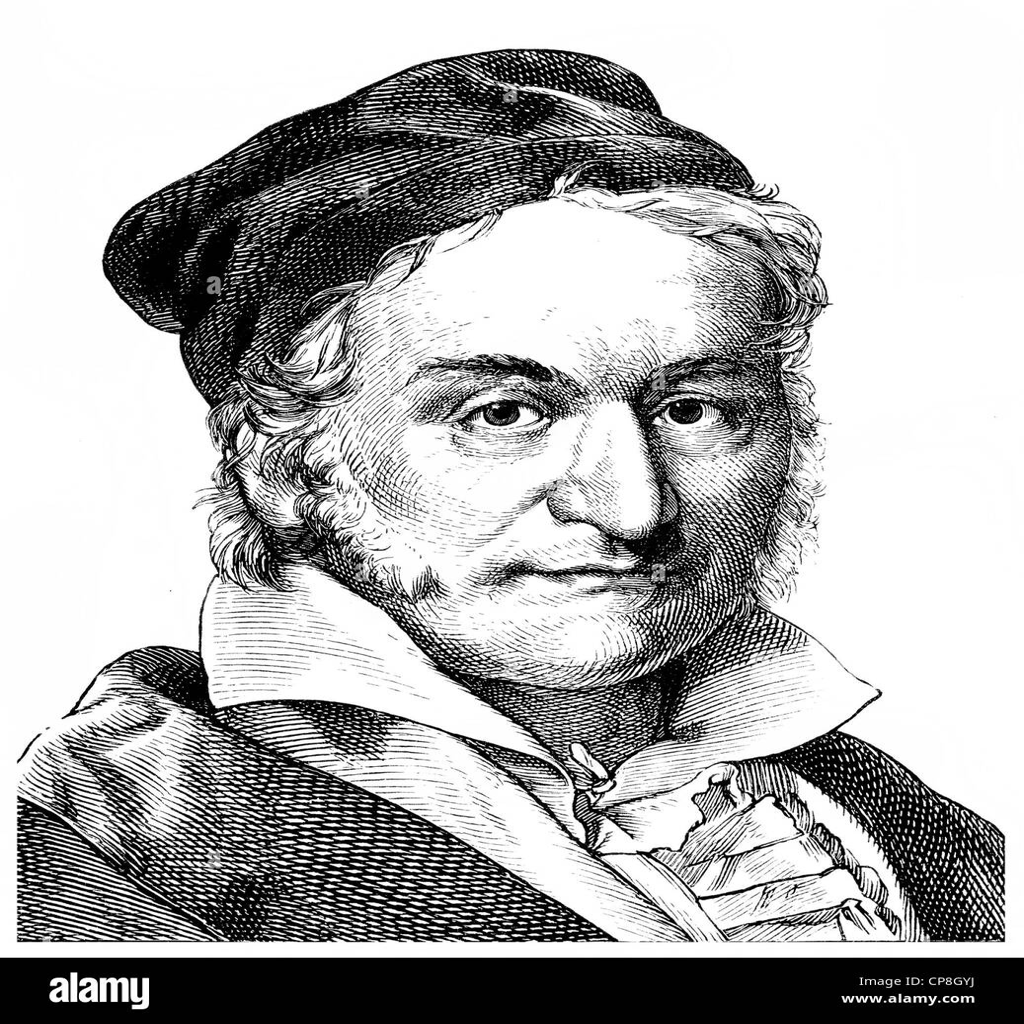

In [23]:
grayscale = gaussimg.convert("L")
grayscale

In [100]:
U, S, VT = scipy.linalg.svd(grayscale)

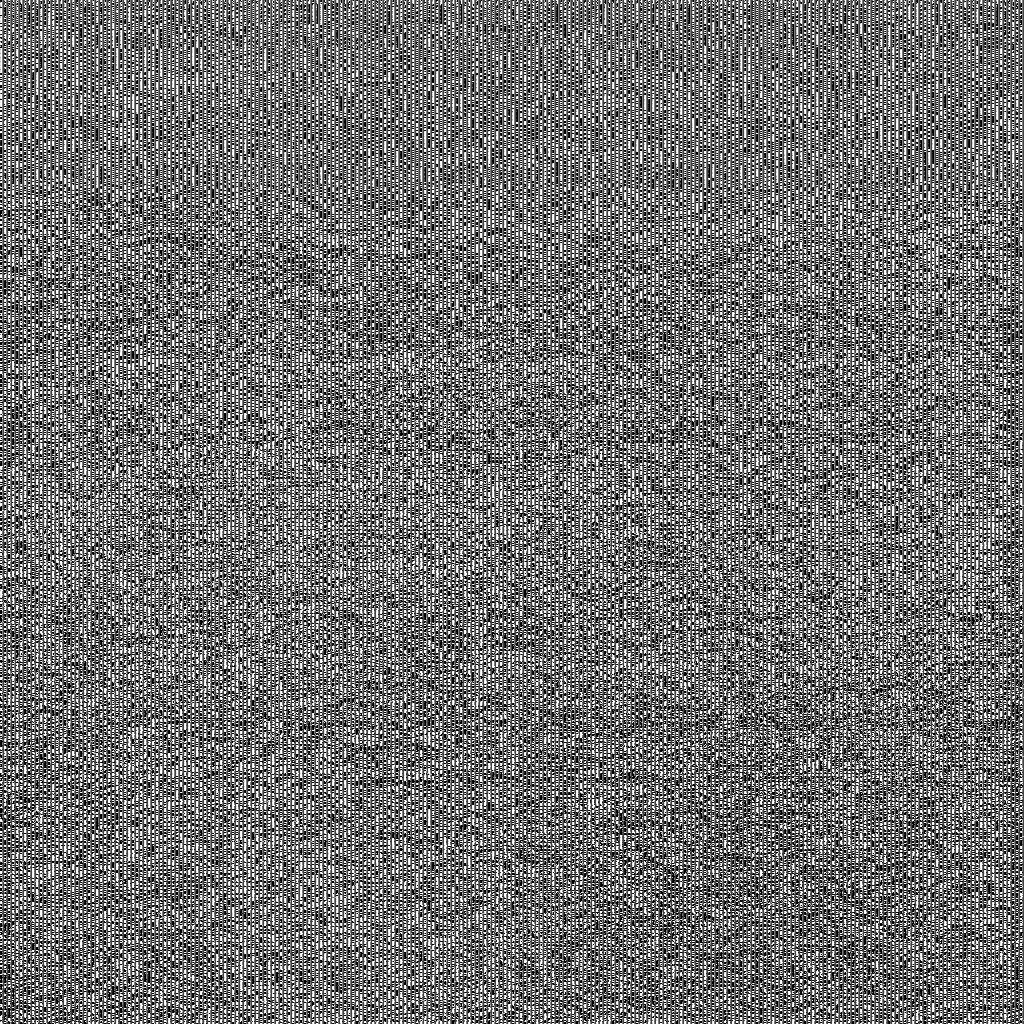

In [102]:
mat = U @ np.diag(S) @ VT
recon_image = Image.fromarray(mat, mode="L")
recon_image

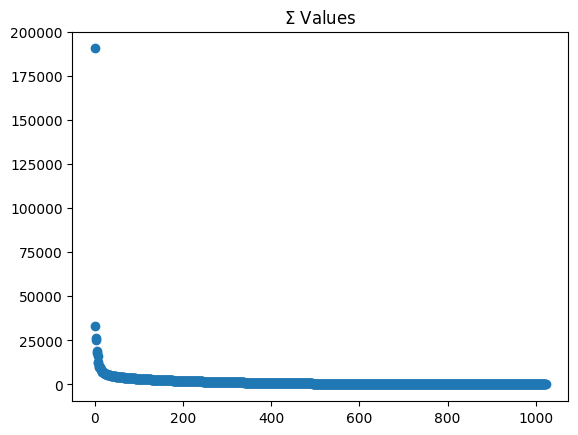

In [103]:
x = range(1024)
y = S

plt.title("$\Sigma$ Values")

plt.scatter(x, y)
plt.show()

In [104]:
threshold = 1200
idx = 0
for i in range(len(S)):
    if S[i] < threshold:
        idx = i
        break
x1 = range(0, idx)
x2 = range(idx, 1024)
y1 = S[:idx]
y2 = S[idx:]

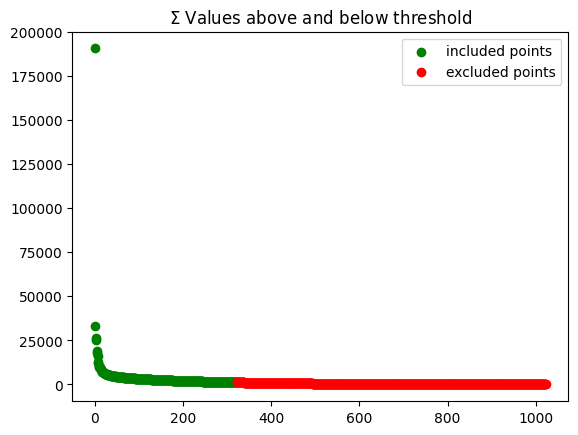

In [105]:
plt.title("$\Sigma$ Values above and below threshold")

plt.scatter(x1, y1, color='green', label='included points')
plt.scatter(x2, y2, color='red', label='excluded points')
plt.legend()
plt.show()

In [106]:
S_red = np.concatenate((y1,np.zeros(len(y2))))
U2 = U[:idx,:]
VT2 = VT[:, :idx]

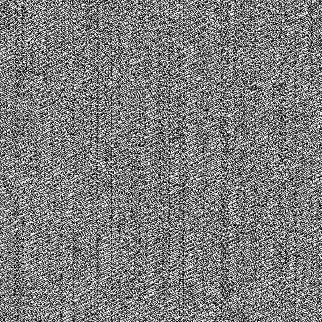

In [107]:
new_mat = U2 @ np.diag(S_red) @ VT2
new_image = Image.fromarray(new_mat, mode="L")
new_image